In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import geopy.distance
import seaborn as sns
from scipy import stats
from matplotlib import animation
import io
import base64
from IPython.display import HTML
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings("ignore")

In [2]:
taxi_green_df = pd.read_csv('summary/nyc_taxi_green_2015_combine_1000000_filter.csv')
taxi_yellow_df = pd.read_csv('summary/nyc_taxi_yellow_2015_combine_1000000_filter.csv')

In [3]:
LL = (-74.30, -73.70, 40.56, 40.90)

### 1. Visualize traffic heatmap of pickup for NYC green and yellow taxi by hour

In [4]:
def animation_hour_pickup(df, hour):
    df = df.loc[df.hour == hour]
    rgb = np.zeros((341, 600), dtype=np.uint8)
    rgb[...] = 0
    rgb[...] = 0
    rgb[...] = 0
    df['pickup_longitude_norm'] = list(map(int,(df.pickup_longitude-(-74.30))*1000))
    df['pickup_latitude_norm'] = list(map(int,(df.pickup_latitude-40.5600)*1000))
    summary_plot = pd.DataFrame(df.groupby(['pickup_latitude_norm', 'pickup_longitude_norm']).count())[['trip_ID']]
    summary_plot = summary_plot.rename(columns = {"trip_ID": "trip_number"}).reset_index()
    lat_list = summary_plot.pickup_latitude_norm.unique()
    max_value = np.log(summary_plot.trip_number+1).max()
    
    for i in lat_list:
        lon_list = summary_plot.loc[summary_plot.pickup_latitude_norm == i].pickup_longitude_norm.tolist()
        unit = summary_plot.loc[summary_plot.pickup_latitude_norm == i].trip_number.tolist()
        for j in lon_list:
            a = unit[lon_list.index(j)]
            rgb[340-i,j] = math.log(a+1,2)
    return rgb, max_value

In [5]:
def build_gif_hour(imgs, title, max_value, save_path):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
    div = make_axes_locatable(ax)
    cax = div.append_axes('right', '5%', '5%')
    ax.set_axis_off()
    hr_range = list(range(0,24))
    def show_im(pairs):
        ax.clear()
        ax.set_title(title + str(int(pairs[0])) + ':00', fontsize=18)
        heatmap = ax.imshow(pairs[1], cmap = 'hot',clim = (0,max_value))
        cax.cla()
        fig.colorbar(heatmap, cax=cax)
        ax.set_axis_off()
    pairs = list(zip(hr_range, imgs))
    im_ani = animation.FuncAnimation(fig, show_im, pairs,interval=500, blit=False, repeat = True)
    plt.close()
    im_ani.save(save_path, writer='imagemagick') #, writer='imagemagick'
    #plt.show()
    return   

In [6]:
taxi_green_df_g = taxi_green_df.copy()
img_list=[]
max_list = []
for i in list(range(0,24)):
    im = animation_hour_pickup(taxi_green_df_g, i)
    img_list.append(im[0])
    max_list.append(im[1])

In [7]:
save_path = 'animation/green_taxi_pickup_hour.gif'
build_gif_hour(img_list, 'Absolute Traffic for NYC green taxi pickup - Hour ', max(max_list), save_path)


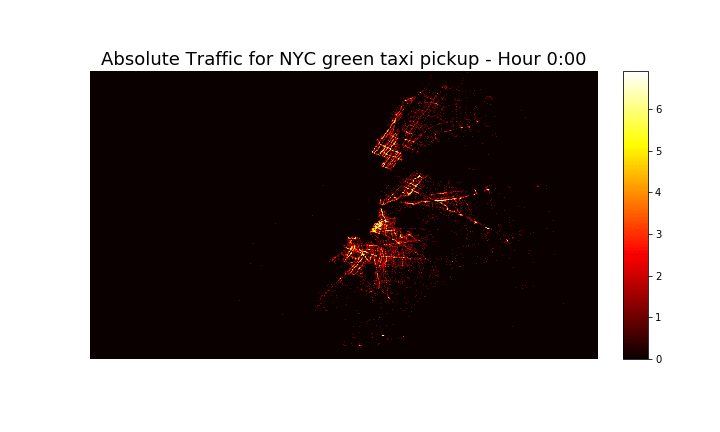

In [8]:
filename = 'animation/green_taxi_pickup_hour.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [11]:
taxi_yellow_df_y = taxi_yellow_df.copy()
img_list=[]
max_list = []
for i in list(range(0,24)):
    im = animation_hour_pickup(taxi_yellow_df_y, i)
    img_list.append(im[0])
    max_list.append(im[1])

In [12]:
save_path = 'animation/yellow_taxi_pickup_hour.gif'
build_gif_hour(img_list, 'Absolute Traffic for NYC yellow taxi pickup - Hour ', max(max_list), save_path)


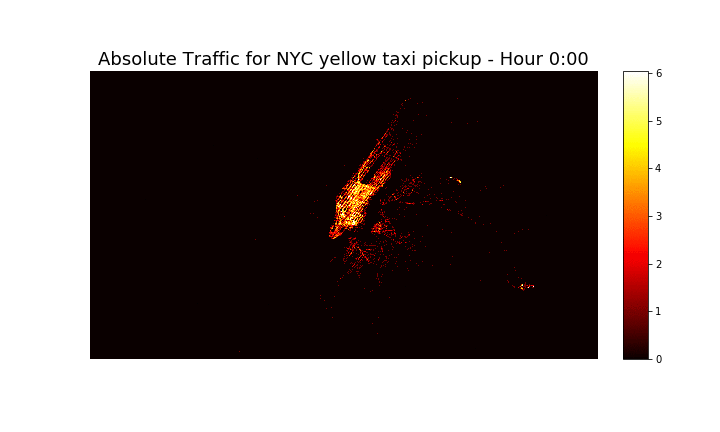

In [14]:
filename = 'animation/yellow_taxi_pickup_hour.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### 2. Visualize traffic heatmap of dropoff for NYC green and yellow taxi by hour

In [15]:
def animation_hour_dropoff(df, hour):
    df = df.loc[df.hour == hour]
    rgb = np.zeros((341, 600), dtype=np.uint8)
    rgb[...] = 0
    rgb[...] = 0
    rgb[...] = 0
    df['dropoff_longitude_norm'] = list(map(int,(df.dropoff_longitude-(-74.30))*1000))
    df['dropoff_latitude_norm'] = list(map(int,(df.dropoff_latitude-40.5600)*1000))
    summary_plot = pd.DataFrame(df.groupby(['dropoff_latitude_norm', 'dropoff_longitude_norm']).count())[['trip_ID']]
    summary_plot = summary_plot.rename(columns = {"trip_ID": "trip_number"}).reset_index()
    lat_list = summary_plot.dropoff_latitude_norm.unique()
    max_value = np.log(summary_plot.trip_number+1).max()
    
    for i in lat_list:
        lon_list = summary_plot.loc[summary_plot.dropoff_latitude_norm == i].dropoff_longitude_norm.tolist()
        unit = summary_plot.loc[summary_plot.dropoff_latitude_norm == i].trip_number.tolist()
        for j in lon_list:
            a = unit[lon_list.index(j)]
            rgb[340-i,j] = math.log(a+1,2)
    return rgb, max_value

In [16]:
taxi_green_df_g = taxi_green_df.copy()
img_list=[]
max_list = []
for i in list(range(0,24)):
    im = animation_hour_dropoff(taxi_green_df_g, i)
    img_list.append(im[0])
    max_list.append(im[1])

In [17]:
save_path = 'animation/green_taxi_dropoff_hour.gif'
build_gif_hour(img_list, 'Absolute Traffic for NYC green taxi dropoff - Hour ', max(max_list), save_path)


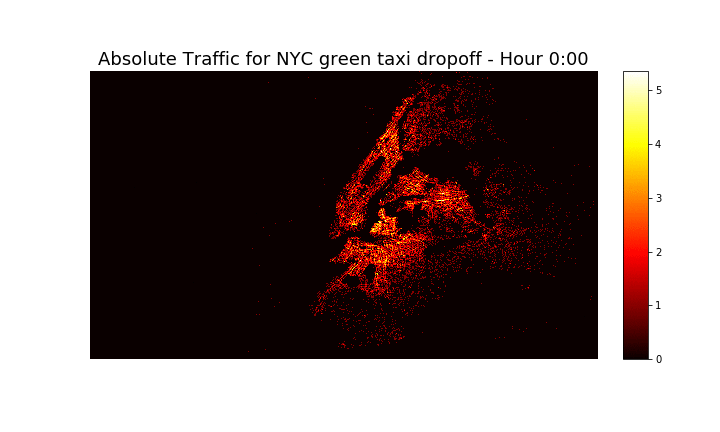

In [18]:
filename = 'animation/green_taxi_dropoff_hour.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [19]:
taxi_yellow_df_y = taxi_yellow_df.copy()
img_list=[]
max_list = []
for i in list(range(0,24)):
    im = animation_hour_dropoff(taxi_yellow_df_y, i)
    img_list.append(im[0])
    max_list.append(im[1])

In [20]:
save_path = 'animation/yellow_taxi_dropoff_hour.gif'
build_gif_hour(img_list, 'Absolute Traffic for NYC yellow taxi dropoff - Hour ', max(max_list), save_path)


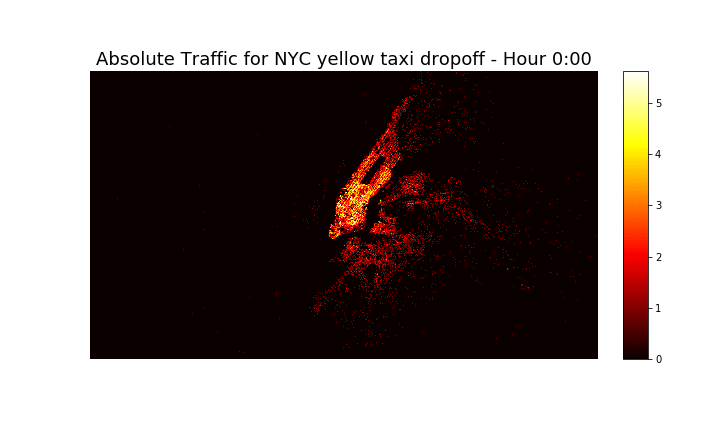

In [21]:
filename = 'animation/yellow_taxi_dropoff_hour.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### 3. Visualize traffic heatmap of pickup for NYC green and yellow taxi by day_of_week

In [22]:
def animation_dayofweek_pickup(df, dayofweek):
    df = df.loc[df.weekday == dayofweek]
    rgb = np.zeros((341, 600), dtype=np.uint8)
    rgb[...] = 0
    rgb[...] = 0
    rgb[...] = 0
    df['pickup_longitude_norm'] = list(map(int,(df.pickup_longitude-(-74.30))*1000))
    df['pickup_latitude_norm'] = list(map(int,(df.pickup_latitude-40.5600)*1000))
    #df['dropoff_longitude_norm'] = list(map(int,(df.dropoff_longitude-(-74.30))*1000))
    #df['dropoff_latitude_norm'] = list(map(int,(df.dropoff_latitude-40.5600)*1000))
    summary_plot = pd.DataFrame(df.groupby(['pickup_latitude_norm', 'pickup_longitude_norm']).count())[['trip_ID']]
    summary_plot = summary_plot.rename(columns = {"trip_ID": "trip_number"}).reset_index()
    lat_list = summary_plot.pickup_latitude_norm.unique()
    max_value = np.log(summary_plot.trip_number+1).max()
    
    for i in lat_list:
        lon_list = summary_plot.loc[summary_plot.pickup_latitude_norm == i].pickup_longitude_norm.tolist()
        unit = summary_plot.loc[summary_plot.pickup_latitude_norm == i].trip_number.tolist()
        for j in lon_list:
            a = unit[lon_list.index(j)]
            rgb[340-i,j] = math.log(a+1,2)
    return rgb, max_value

In [23]:
def build_gif_dayofweek(imgs, title, max_value, save_path):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
    div = make_axes_locatable(ax)
    cax = div.append_axes('right', '5%', '5%')
    ax.set_axis_off()
    dayofweek_range = list(range(0,24))
    dayofweek_dict = {1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun', 0:'Mon'}
    def show_im(pairs):
        ax.clear()
        ax.set_title(title + str(dayofweek_dict[int(pairs[0])]), fontsize=18)
        heatmap = ax.imshow(pairs[1], cmap = 'hot',clim = (0,max_value))
        cax.cla()
        fig.colorbar(heatmap, cax=cax)
        ax.set_axis_off()
    pairs = list(zip(dayofweek_range, imgs))
    im_ani = animation.FuncAnimation(fig, show_im, pairs,interval=500, blit=False, repeat = True)
    plt.close()
    im_ani.save(save_path, writer='imagemagick') #, writer='imagemagick'
    #plt.show()
    return   

In [24]:
taxi_green_df_g = taxi_green_df.copy()
img_list=[]
max_list = []
for i in np.arange(7):
    im = animation_dayofweek_pickup(taxi_green_df_g, i)
    img_list.append(im[0])
    max_list.append(im[1])

In [25]:
save_path = 'animation/green_taxi_pickup_dayofweek.gif'
build_gif_dayofweek(img_list, 'Absolute Traffic for NYC green taxi pickup - ', max(max_list), save_path)


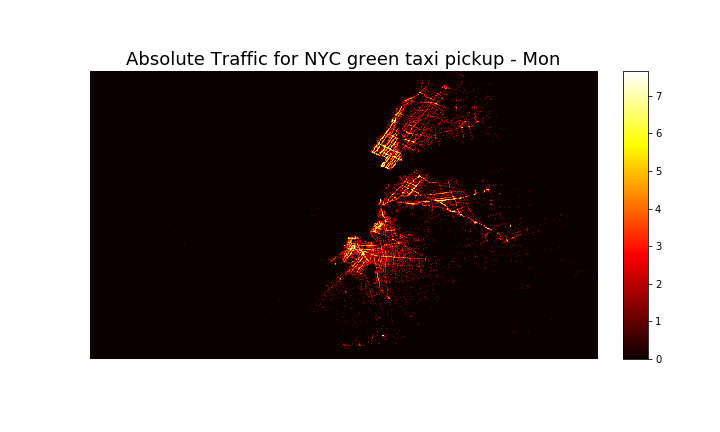

In [26]:
filename = 'animation/green_taxi_pickup_dayofweek.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [27]:
taxi_yellow_df_y = taxi_yellow_df.copy()
img_list=[]
max_list = []
for i in np.arange(7):
    im = animation_dayofweek_pickup(taxi_yellow_df_y, i)
    img_list.append(im[0])
    max_list.append(im[1])

In [28]:
save_path = 'animation/yellow_taxi_pickup_dayofweek.gif'
build_gif_dayofweek(img_list, 'Absolute Traffic for NYC yellow taxi pickup - ', max(max_list), save_path)


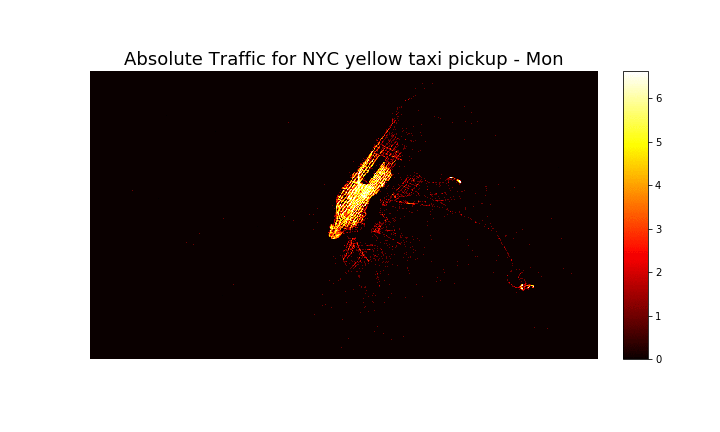

In [29]:
filename = 'animation/yellow_taxi_pickup_dayofweek.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### 4. Visualize traffic heatmap of dropoff for NYC green and yellow taxi by day_of_week

In [30]:
def animation_dayofweek_dropoff(df, dayofweek):
    df = df.loc[df.weekday == dayofweek]
    rgb = np.zeros((341, 600), dtype=np.uint8)
    rgb[...] = 0
    rgb[...] = 0
    rgb[...] = 0
    #df['pickup_longitude_norm'] = list(map(int,(df.pickup_longitude-(-74.30))*1000))
    #df['pickup_latitude_norm'] = list(map(int,(df.pickup_latitude-40.5600)*1000))
    df['dropoff_longitude_norm'] = list(map(int,(df.dropoff_longitude-(-74.30))*1000))
    df['dropoff_latitude_norm'] = list(map(int,(df.dropoff_latitude-40.5600)*1000))
    summary_plot = pd.DataFrame(df.groupby(['dropoff_latitude_norm', 'dropoff_longitude_norm']).count())[['trip_ID']]
    summary_plot = summary_plot.rename(columns = {"trip_ID": "trip_number"}).reset_index()
    lat_list = summary_plot.dropoff_latitude_norm.unique()
    max_value = np.log(summary_plot.trip_number+1).max()
    
    for i in lat_list:
        lon_list = summary_plot.loc[summary_plot.dropoff_latitude_norm == i].dropoff_longitude_norm.tolist()
        unit = summary_plot.loc[summary_plot.dropoff_latitude_norm == i].trip_number.tolist()
        for j in lon_list:
            a = unit[lon_list.index(j)]
            rgb[340-i,j] = math.log(a+1,2)
    return rgb, max_value

In [31]:
taxi_green_df_g = taxi_green_df.copy()
img_list=[]
max_list = []
for i in np.arange(7):
    im = animation_dayofweek_dropoff(taxi_green_df_g, i)
    img_list.append(im[0])
    max_list.append(im[1])

In [32]:
save_path = 'animation/green_taxi_dropoff_dayofweek.gif'
build_gif_dayofweek(img_list, 'Absolute Traffic for NYC green taxi dropoff - ', max(max_list), save_path)


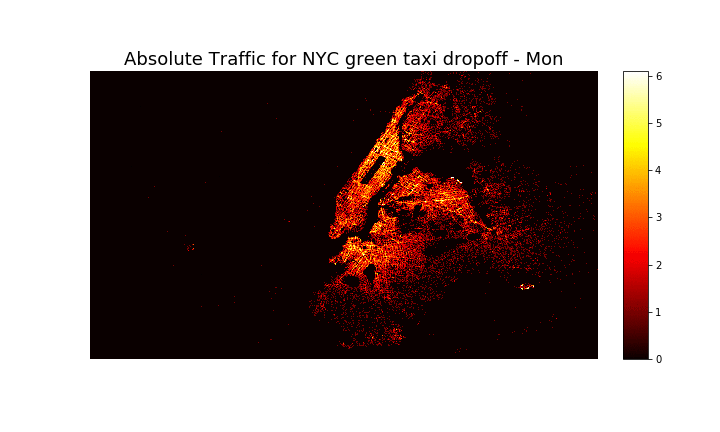

In [33]:
filename = 'animation/green_taxi_dropoff_dayofweek.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [34]:
taxi_yellow_df_y = taxi_yellow_df.copy()
img_list=[]
max_list = []
for i in np.arange(7):
    im = animation_dayofweek_dropoff(taxi_yellow_df_y, i)
    img_list.append(im[0])
    max_list.append(im[1])

In [35]:
save_path = 'animation/yellow_taxi_dropoff_dayofweek.gif'
build_gif_dayofweek(img_list, 'Absolute Traffic for NYC yellow taxi dropoff - ', max(max_list), save_path)


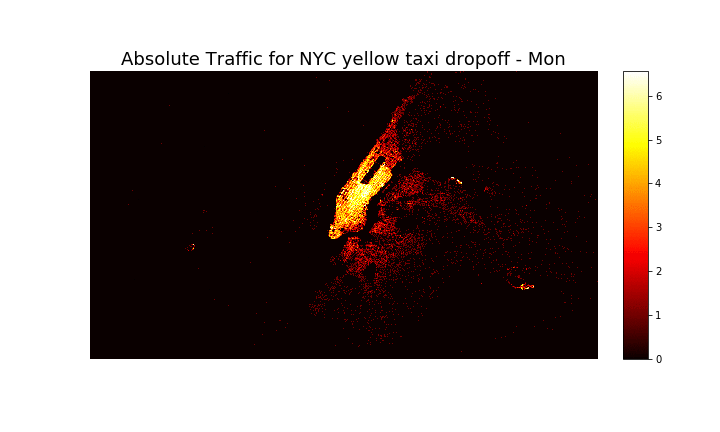

In [36]:
filename = 'animation/yellow_taxi_dropoff_dayofweek.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### 5. Visualize heatmap of speed for NYC green and yellow taxi by hour

In [37]:
def animation_hour_speed(df, hour):
    df = df.loc[df.hour == hour]
    rgb = np.zeros((341, 600), dtype=np.uint8)
    rgb[...] = 0
    rgb[...] = 0
    rgb[...] = 0
    df['pickup_longitude_norm'] = list(map(int,(df.pickup_longitude-(-74.30))*1000))
    df['pickup_latitude_norm'] = list(map(int,(df.pickup_latitude-40.5600)*1000))
    #df['dropoff_longitude_norm'] = list(map(int,(df.dropoff_longitude-(-74.30))*1000))
    #df['dropoff_latitude_norm'] = list(map(int,(df.dropoff_latitude-40.5600)*1000))
    summary_plot = pd.DataFrame(df.groupby(['pickup_latitude_norm', 'pickup_longitude_norm']).mean())[['speed']]
    summary_plot = summary_plot.reset_index()
    lat_list = summary_plot.pickup_latitude_norm.unique()
    #max_value = np.log(summary_plot.trip_number+1).max()
    
    for i in lat_list:
        lon_list = summary_plot.loc[summary_plot.pickup_latitude_norm == i].pickup_longitude_norm.tolist()
        unit = summary_plot.loc[summary_plot.pickup_latitude_norm == i].speed.tolist()
        for j in lon_list:
            a = np.log(unit[lon_list.index(j)]+8)
            rgb[340-i,j] = a*100
    return rgb

In [38]:
taxi_green_df_g = taxi_green_df.copy()
img_list=[]
#max_list = []
for i in list(range(0,24)):
    im = animation_hour_speed(taxi_green_df_g, i)
    img_list.append(im)
    #max_list.append(im[1])

In [39]:
save_path = 'animation/green_taxi_speed_hour.gif'
build_gif_hour(img_list, 'Absolute Traffic for NYC green taxi speed - Hour ', 80, save_path)


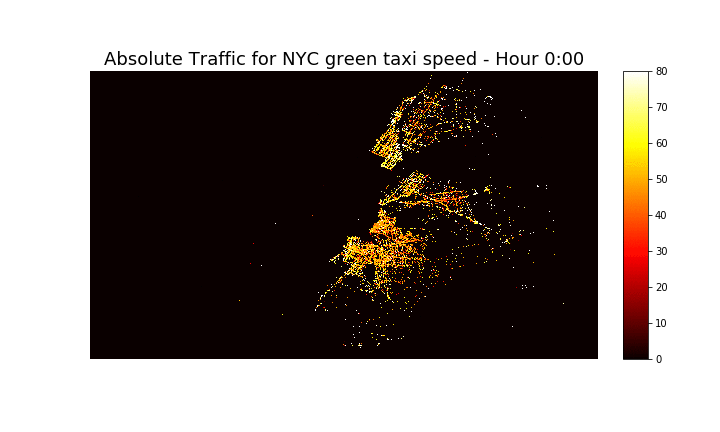

In [40]:
filename = 'animation/green_taxi_speed_hour.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [41]:
taxi_yellow_df_y = taxi_yellow_df.copy()
img_list=[]
#max_list = []
for i in list(range(0,24)):
    im = animation_hour_speed(taxi_yellow_df_y, i)
    img_list.append(im)
    #max_list.append(im[1])

In [42]:
save_path = 'animation/yellow_taxi_speed_hour.gif'
build_gif_hour(img_list, 'Absolute Traffic for NYC yellow taxi speed - Hour ', 80, save_path)


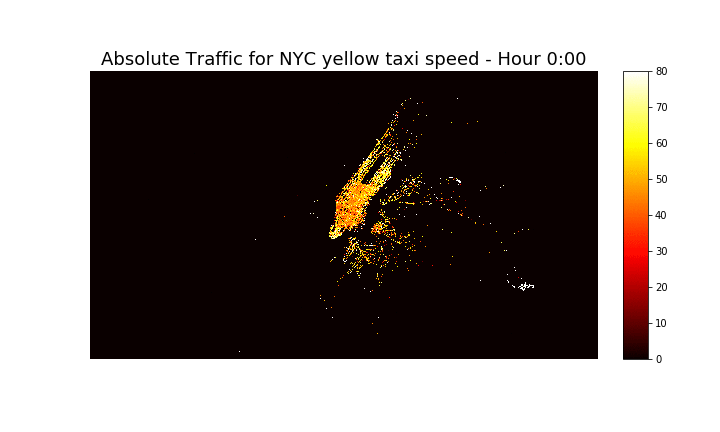

In [43]:
filename = 'animation/yellow_taxi_speed_hour.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))